In [40]:
import os
import sys

current_dir = os.getcwd() # for notebooks use this to get directory
repo_dir    = os.path.join(current_dir, '../../')
sys.path.insert(0, os.path.abspath(repo_dir))


os.path.isdir('./')
os.listdir('./src')
# os.listdir('../../')

FileNotFoundError: [Errno 2] No such file or directory: './src'

In [45]:
os.listdir(f'{repo_dir}/src/TCP/')

['filename.npy',
 'ort_reader.py',
 'test.py',
 'server.py',
 'tests.py',
 'README',
 'listener.py',
 'plot.ipynb',
 'saved',
 'listener_linux.py']

### Solving the DMD issue of too many sent triggers.

Apparently, the number of triggers i decide to send with the VEC files ( ne number of frames / lines) is not exactly the one sent bu the DMD, or there is a problem with my trigger detection. To solve it lets plot the received signal.

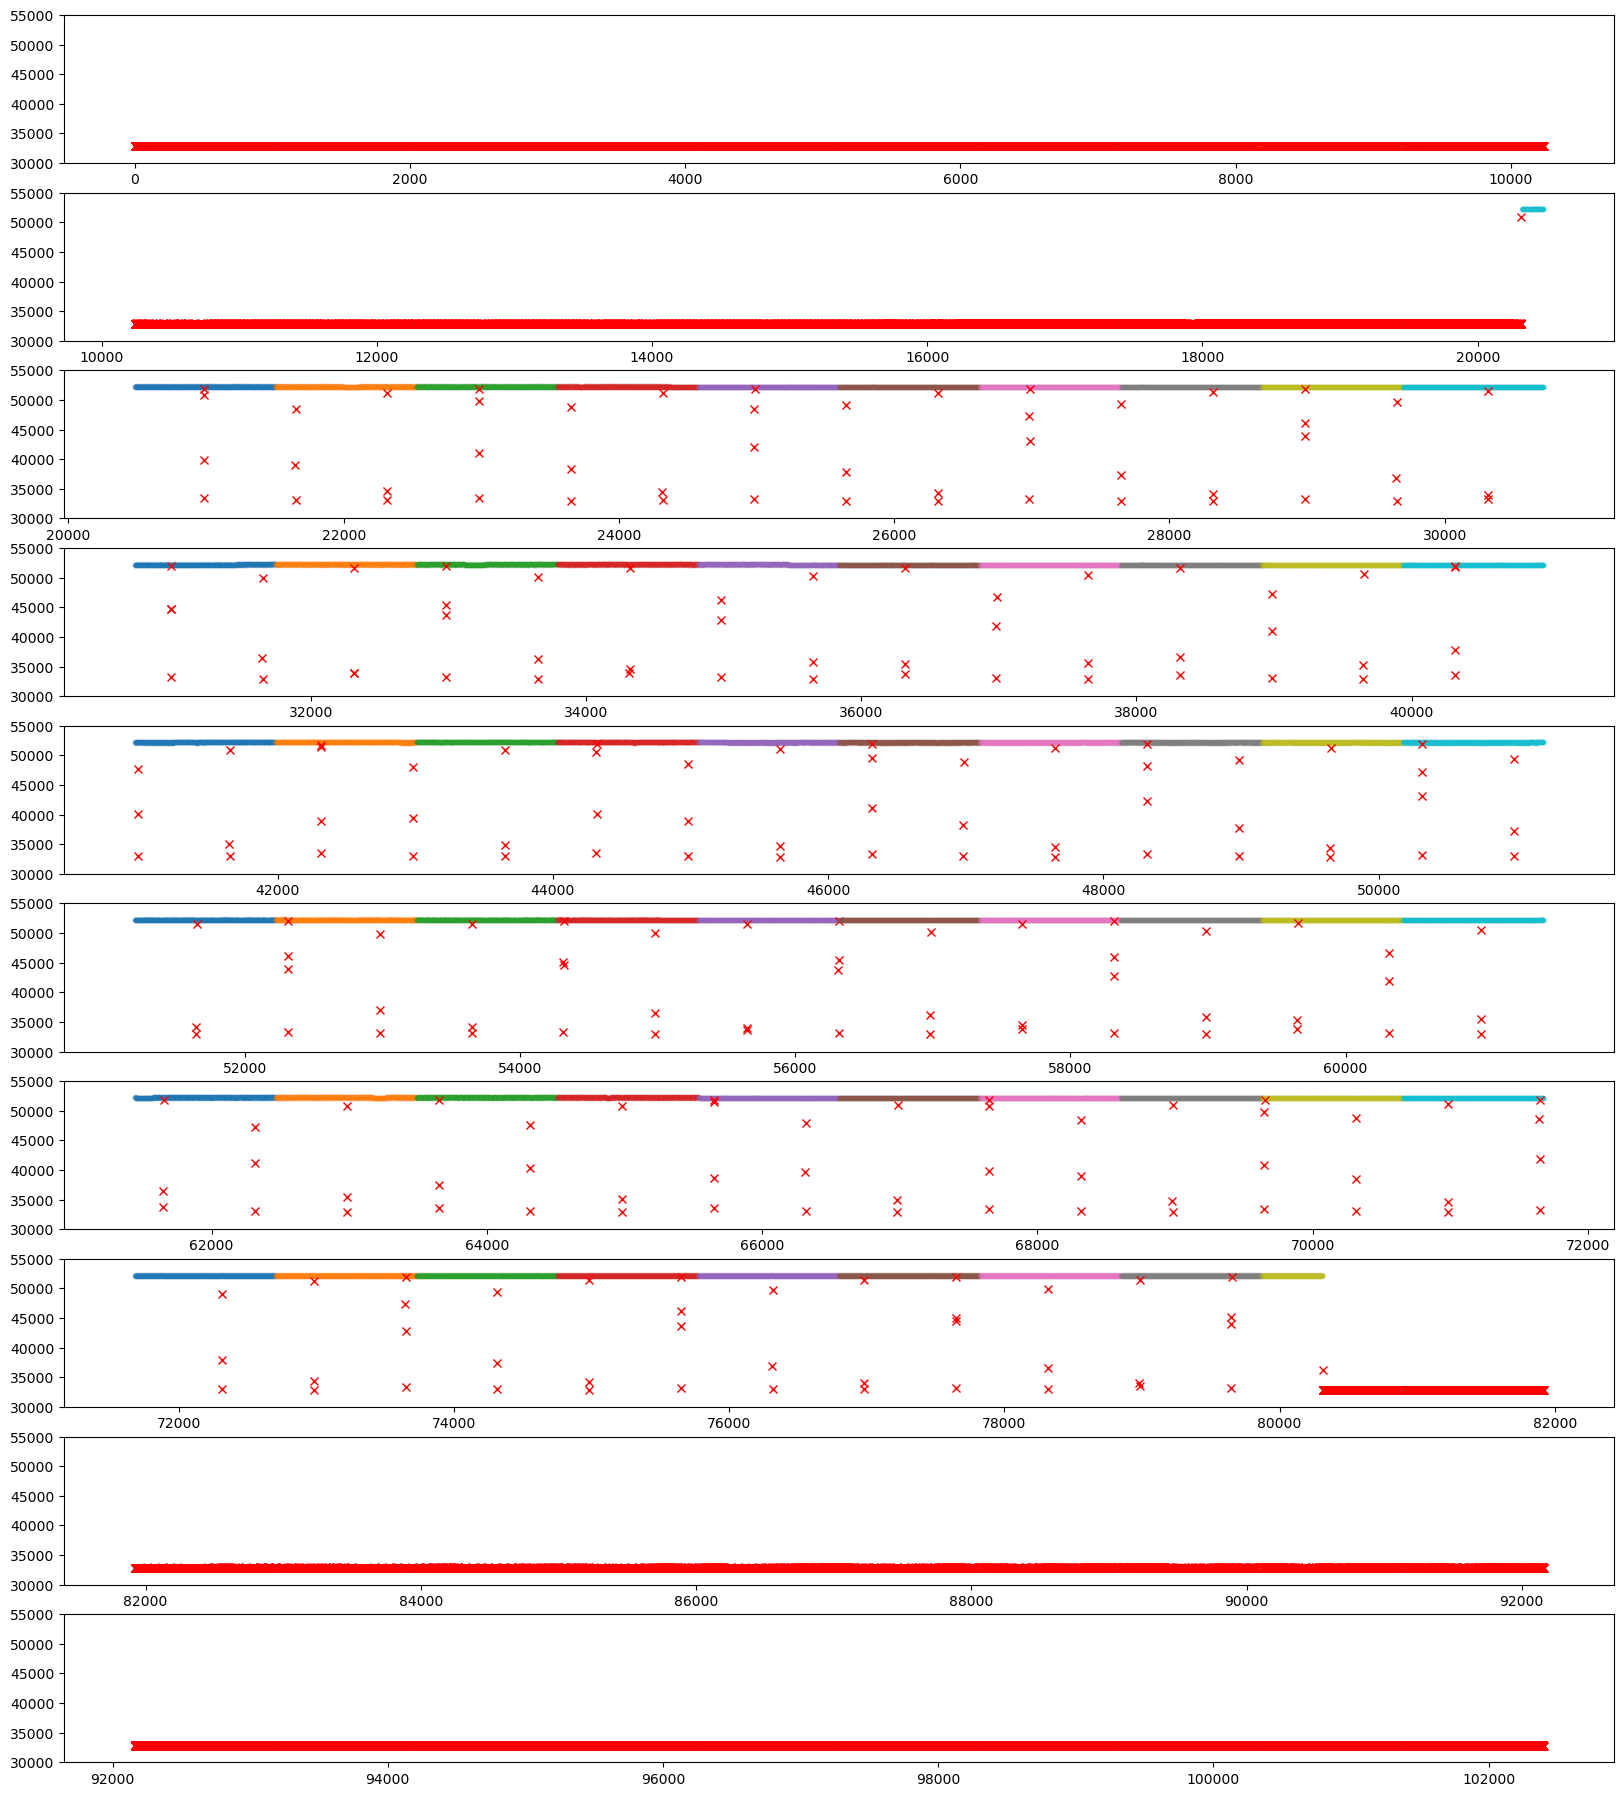

In [91]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 25))

min_buffer = 11
start_buffer = min_buffer + 0
final_buffer = start_buffer + 100
buffers_n = final_buffer - start_buffer
x = np.arange(0, 1024*buffers_n, 1)
trg_ch_data = np.array([])
prev_idx = 0

just_triggered = False
w = 0

for i in range(start_buffer, final_buffer):

    data = np.load(f'{repo_dir}src/TCP/saved/trg_ch_bf_{i}_issueDMD1.npy').astype(np.int32)
    # print('   ')
    # print( data.max())
    start_idx = (i-start_buffer) * 1024
    end_idx = start_idx + 1024
    idx = (i-start_buffer)//10 + 1
    trg_ch_data = np.append(trg_ch_data, data)
    plt.subplot((buffers_n)//10 + 1, 1, idx, alpha=0.1)
    # if idx != prev_idx:
    #     print(f'idx: {idx}, prev_idx: {prev_idx}')
    #     prev_idx = idx
    plt.plot( x[start_idx:end_idx], data, '.', label=f'ch_bf_{i}', alpha=0.1)
    plt.plot(x[start_idx:end_idx][data<52000 ], data[data < 52000], 'rx', alpha=1)
    plt.ylim(3.0e4, 5.5e4)
    # plt.xlim(start_idx, start_idx+1024*10)


    
    
    # print(f'Number of triggers in sequence {i}: {n_triggers}')

In [79]:
data.shape
# x.shape
# x[start_idx:end_idx].shape

(1024,)